# Linear regression

Import all the modules you will need in this notebook here:

In [1]:
# exercise 0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [2]:
# exercise 1

def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

fram = pd.read_csv('src/fram.txt', sep='\t')
print('Rows: {}, Columns: {}\n'.format(*fram.shape))
print('Variables: {}'.format(list(fram.columns)))
fram.describe()

Rows: 1394, Columns: 14

Variables: ['ID', 'SEX', 'AGE', 'FRW', 'SBP', 'SBP10', 'DBP', 'CHOL', 'CIG', 'CHD', 'YRS_CHD', 'DEATH', 'YRS_DTH', 'CAUSE']


,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [3]:
# exercise 2

def rescale(s):
    s_centered = s - s.mean()
    s_normalized = s_centered / (2 * s.std())
    return s_normalized

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [4]:
# exercise 3

continuous_vars = 'AGE FRW SBP DBP CHOL CIG'.split()
for var in continuous_vars:
    fram['s'+var] = rescale(fram[var])    
fram.head()

,ID,SEX,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,YRS_CHD,DEATH,YRS_DTH,CAUSE,sAGE,sFRW,sSBP,sDBP,sCHOL,sCIG
0,4988,female,57,135,186,NaN,120,150,0,1,pre,7,11,unknown,0.477764,0.834668,0.676501,1.049625,-0.914016,-0.346569
1,3001,female,60,123,165,NaN,100,167,25,0,16,10,17,unknown,0.791473,0.496687,0.301796,0.346698,-0.730446,0.732493
2,5079,female,54,115,140,NaN,90,213,5,0,8,8,13,unknown,0.164056,0.271367,-0.144281,-0.004765,-0.233727,-0.130757
3,5162,female,52,102,170,NaN,104,280,15,0,10,7,11,unknown,-0.045083,-0.094779,0.391012,0.487283,0.489755,0.300868
4,4672,female,45,99,185,NaN,105,326,20,0,8,10,17,unknown,-0.777070,-0.179274,0.658658,0.522430,0.986475,0.516680


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [5]:
# exercise 4

formula = 'SBP ~ sFRW + SEX + sCHOL'
fit = smf.ols(formula, data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           4.13e-40
Time:                        00:12:38   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [6]:
# exercise 5

formula = 'SBP ~ sFRW + SEX + sCHOL + sAGE'
fit = smf.ols(formula, data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           2.44e-46
Time:                        00:12:38   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***
The inclusion of `sAGE` increases the R-squared statistic of the model from 0.125 to 0.146. This means that the model went from explaining approximately 12.5% of the variance of the data to explaining around 14.6%, which is an increase of 2.1 percentual points.  
Because the variables are standardized, we can compare their relevance to the model by looking at their coefficient estimates. The coefficient of a standardized variable shows the effect that an increase of 1 standard deviation on that variable would have on the target. So, the most relevant variables are the ones with higher absolute values on the coeffient, in this case `sFRW` (abs(coef) = 16.9771), followed by `sAGE` (abs(coef) = 8.1332), and finally `SEX` (abs(coef) = 4.3805) and `sCHOL` (abs(coef) = 4.2696) with quite similar values.

***

Try to add to the model all the interactions with other variables. 

In [7]:
# exercise 6

variables = 'sFRW SEX sCHOL sAGE'.split()
interactions = []
for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        interactions.append(var1 + ':' + var2)
        
formula = 'SBP ~ {} + {}'.format(' + '.join(variables), ' + '.join(interactions))
fit = smf.ols(formula, data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           4.92e-43
Time:                        00:12:38   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.001    150.355      0.000     148.580     152.508
SEX[T.male]          -4.7309      1.451     -3.261      0.001      -7.577      -1.885
sFRW                 16.6450      1.723      9.660      0.000      13.265      20.025
sFRW:SEX[T.male]      1.6673      3.088      0.540      0.589      -4.390       7.725
sCHOL                 3.6181      1.878      1.926      0.054      -0.066       7.302
SEX[T.male]:sCHOL     1.0231      2.933      0.349      0.727      -4.730       6.776
sAGE                 10.2189      2.003      5.101      0.000       6.289      14.149
SEX[T.male]:sAGE     -4.2923      2.886     -1.488      0.137      -9.953       1.368
sFRW:sCHOL            4.9729      2.718      1.829      0.068      -0.359      10.305
sFRW:sAGE            -2.0866      2.803     -0.744      0.457      -7.585       3.412
sCHOL:sAGE           -4.7564      3.044     -1.563      0.118     -10.728       1.215
==============================================================================
Omnibus:                      313.112   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.290
Skew:                           1.185   Prob(JB):                    6.10e-175
Kurtosis:                       5.863   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

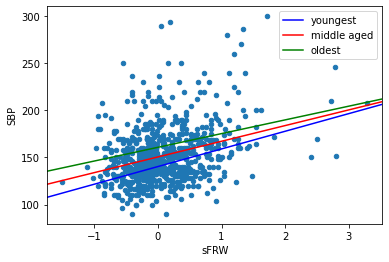

In [8]:
# exercise 7

women = fram[fram['SEX'] == 'female']
women.plot.scatter('sFRW', 'SBP')

coef = fit.params
categories = {'youngest': -1.0, 'middle aged': 0.0, 'oldest': 1.0}
for label, value in categories.items():
    intercept = coef['Intercept'] + (value * coef['sAGE'])
    slope = coef['sFRW'] + (value * coef['sFRW:sAGE'])
    abline_plot(intercept, slope, ax=plt.gca(), color='rgb'[int(value)], label=label)
plt.legend()

plt.show()

How does the dependence of blood pressure on weight change as a person gets older?
***

The dependence of blood pressure on weight gets weaker as a person gets older. The baseline for blood pressure gets higher with age (the intercept of the line increases with age), but changes in weight have smaller effects on blood pressure for older people (the slope of the line decreases with age).
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           2.99e-40
Time:                        00:12:38   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

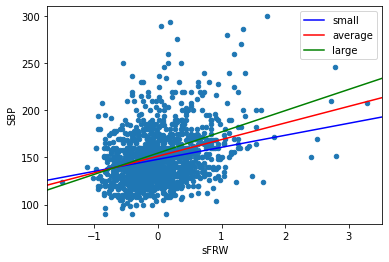

In [9]:
# exercise 8

variables = 'sFRW SEX sCHOL sAGE sCIG'.split()
interactions = []
for i, var1 in enumerate(variables):
    for var2 in variables[i+1:]:
        interactions.append(var1 + ':' + var2)
        
formula = 'SBP ~ {} + {}'.format(' + '.join(variables), ' + '.join(interactions))
fit = smf.ols(formula, data=fram).fit()
print(fit.summary())

fram.plot.scatter('sFRW', 'SBP')

coef = fit.params
categories = {'small': -1.0, 'average': 0.0, 'large': 1.0}
for label, value in categories.items():
    intercept = coef['Intercept'] + (value * coef['sCHOL'])
    slope = coef['sFRW'] + (value * coef['sFRW:sCHOL'])
    abline_plot(intercept, slope, ax=plt.gca(), color='rgb'[int(value)], label=label)

plt.legend()
plt.show()

How does the model and its accuracy look?

***

The inclusion of `sCIG` and its interactions doesn't seem to add much to the accuracy of the model. The R-squared became 0.152, only a 0.01 increase from the previous model's 0.151. The coefficient estimates of the added variables are all amongst the lowest, and none of their p-values indicates that they are statistically significant. Usually, an estimate is considered statistically significant if its p-value is lower than 0.1, 0.05 or 0.01, depending on the level of confidence required by the problem. The p-values of these variables' coefficient estimates are all between 0.225 (for `sCIG`) and 0.918 (for `sAGE:sCIG`), so none of the variables seems to be relevant. I would choose not to keep them in the model.
***

# Logistic regression

In [10]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [11]:
# exercise 9

fram['HIGH_BP'] = (fram['SBP'] >= 140) | (fram['DBP'] >= 90)
fram['HIGH_BP'] = fram['HIGH_BP'].map(int)

formula = 'HIGH_BP ~ sFRW + SEX + SEX:sFRW'
fit = smf.glm(formula, data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

pred_prob = fit.fittedvalues
false_negative = (pred_prob < 0.5) & fram['HIGH_BP']
false_positive = (pred_prob > 0.5) & ~fram['HIGH_BP']
error_rate_orig = np.mean(false_negative | false_positive)
print('\nError rate:', error_rate_orig)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Mon, 28 Sep 2020   Deviance:                       1713.7
Time:                        00:12:38   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [12]:
# exercise 10

formula = 'HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + sAGE:SEX'
fit = smf.glm(formula, data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

pred_prob = fit.fittedvalues
false_negative = (pred_prob < 0.5) & fram['HIGH_BP']
false_positive = (pred_prob > 0.5) & ~fram['HIGH_BP']
error_rate = np.mean(false_negative | false_positive)
print('\nError rate:', error_rate)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Mon, 28 Sep 2020   Deviance:                       1691.0
Time:                        00:12:39   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

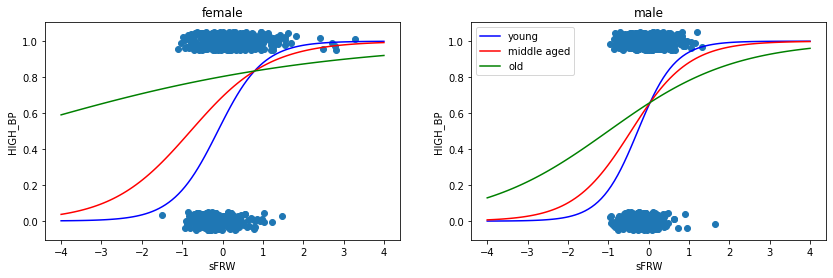

In [13]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

fig, ax = plt.subplots(1,2, figsize=(14,4), subplot_kw={'xlabel': 'sFRW', 'ylabel': 'HIGH_BP'})

X = np.linspace(-4, 4, 100)
coef = fit.params
cat1 = {'female': 0, 'male': 1}
cat2 = {'young': -1.0, 'middle aged': 0.0, 'old': 1.0}

for label1, value1 in cat1.items():
    ax[value1].set_title(label1)
    subset = fram[fram['SEX'] == label1]
    jitter = np.random.uniform(-0.05, 0.05, len(subset))
    ax[value1].scatter(subset['sFRW'], subset['HIGH_BP'] + jitter)
    
    for label2, value2 in cat2.items():
        intercept = coef['Intercept'] + (value1 * coef['SEX[T.male]']) + (value2 * coef['sAGE']) + (value1 * value2 * coef['sAGE:SEX[T.male]'])
        slope = coef['sFRW'] + (value1 * coef['SEX[T.male]:sFRW']) + (value2 * coef['sAGE:sFRW'])
        ax[value1].plot(X, logistic(intercept + slope*X), color='rgb'[int(value2)], label=label2)
        
plt.legend()
plt.show()

How do the models with different ages and genders differ from each other?

***
In general, the probability of high blood pressure gets higher as weight gets higher. However, this relationship seems to get weaker as a person gets older, as we can see by the softer curves of the oldest age groups compared to the youngest. The curves also differ between genders. Women seem to have a higher chance of high blood pressure compared to men, and it seems to depend less on weight. This happens in all age groups, but especially in the oldest: even at the lower end of the weight scale, older women have around 0.6 probability of high blood pressure, compared to less than 0.2 for men on the same age group.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [14]:
# exercise 12

def train_test_split(df, train_fraction):
    train = df.sample(frac=train_fraction, axis=0)
    test = df.drop(train.index, axis=0)
    return train, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [15]:
# exercise 13

formula = 'HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + sAGE:SEX'
error_model = []
np.random.seed(1)
for _ in range(100):
    train, test = train_test_split(fram, 0.8)
    fit = smf.glm(formula, data=train, family=sm.families.Binomial()).fit()
    pred_prob = fit.predict(test)
    error_rate = np.mean(((pred_prob < 0.5) & test['HIGH_BP']) | ((pred_prob > 0.5) & ~test['HIGH_BP']))
    error_model.append(error_rate)
    
print('Error rate:', np.mean(error_model))

Error rate: 0.3311827956989247


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [16]:
# exercise 14

fram['hasCHD'] = fram['CHD'] > 0
fram['hasCHD'] = fram['hasCHD'].map(int)

print('Mean hasCHD:', np.mean(fram['hasCHD']), '(proportion of people with CHD)')

Mean hasCHD: 0.22022955523672882 (proportion of people with CHD)


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [17]:
# exercise 15

formula = 'hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW'
fit = smf.glm(formula, data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

pred_prob = fit.fittedvalues
error_rate = np.mean(((pred_prob < 0.5) & fram['hasCHD']) | ((pred_prob > 0.5) & ~fram['hasCHD']))
print('\nError rate:', error_rate)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Mon, 28 Sep 2020   Deviance:                       1442.4
Time:                        00:12:41   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

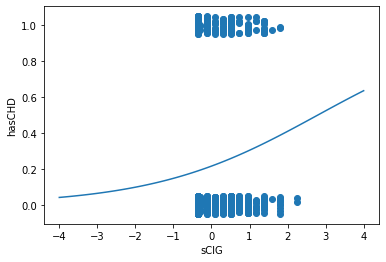

In [18]:
# exercise 16

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

jitter = np.random.uniform(-0.05, 0.05, len(fram))
plt.scatter(fram['sCIG'], fram['hasCHD'] + jitter)

X = np.linspace(-4, 4, 100)
coef = fit.params
plt.plot(X, logistic(coef['Intercept'] + coef['sCIG']*X))

plt.xlabel('sCIG')
plt.ylabel('hasCHD')
plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
The prediction accuracy is bad. If we predict no coronary heart disease (`hasCHD` = 0) for every observation, the error rate is the fraction of people with coronary heart disease (`hasCHD` = 1), which is around 0.22 (from the calculation of the mean). This is exactly the same error rate this model is producing. It doesn't seem to perform better than the base rate of just predicting the most common category, so we shouldn't expect it to be very useful in practice.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [19]:
# exercise 17

def normalize(val, s):
    return (val - s.mean()) / (2 * s.std())

point = {'sCHOL': normalize(200, fram['CHOL']), 'sCIG': normalize(17, fram['CIG']), 'sFRW': normalize(100, fram['FRW'])}
predicted = fit.predict(point)[0]
print('P(hasCHD | (sCHOL=200, sCIG=17, sFRW=100)) =', predicted)

P(hasCHD | (sCHOL=200, sCIG=17, sFRW=100)) = 0.21616166025041006
